In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle

In [2]:
#input parameter 
initial_p = np.array([1.32559, 1.2061])
# initial_p = np.array([1.32559, 2])
l =  2.7       #wheel_base
l_f =   0.89    # front_overhang
l_r=   1.1      # rear_overhang
r_min =   4.25   #minimum_turning_radius
w = 1.86 #car_width

In [3]:
s_1 = np.sqrt((l + l_f)**2 + 2*r_min*w)    

s_0 = s_1 + l_r          # distance between two obstacle
print("Required total Parking length = ",s_0)

s_2 = np.sqrt((r_min +(w/2))**2 + l_r**2) - (r_min-(w/2))      # min required width
print("Required total Parking width = ",s_2)
    
    
final_p = np.array([-s_1, -w/2])
o_1 = np.array([initial_p[0],initial_p[1]-r_min])


print("Reference point starting side = ",o_1)

o_2 = np.array([-s_1, r_min-(w/2)])
print("Reference point final side= ",o_2)

theta = np.arcsin((initial_p[0] + s_1)/np.linalg.norm(o_1-o_2)) -np.arccos((2*r_min)/np.linalg.norm(o_1-o_2))
print("Theta angle = ",theta,"degree")


G_2 = np.array([initial_p[0]-r_min*(np.sin(theta)), initial_p[1]-r_min*(1 - np.cos(theta)) ])
G_3 = np.array([-s_1 + r_min*np.sin(theta), r_min*(1-np.cos(theta)) - (w/2) ])
print("G_1= ", initial_p)
print("G_2= ",G_2)
print("G_3= ", G_3)
print("G_4= ", final_p)
    
first_arc_l = r_min*theta
print("G1 to G2 arc length= ",first_arc_l)

second_arc_l = np.linalg.norm(G_2-G_3)
print("G2 to G3 arc length= ",second_arc_l )

print( "G3 to G4 arc length= ",first_arc_l)

total_arc_l = 2*first_arc_l + second_arc_l

print("total arc length G1 to G4= ",total_arc_l)

Required total Parking length =  6.45706076127572
Required total Parking width =  1.9755075299729294
Reference point starting side =  [ 1.32559 -3.0439 ]
Reference point final side=  [-5.35706076  3.32      ]
Theta angle =  0.40993538140884106 degree
G_1=  [1.32559 1.2061 ]
G_2=  [-0.36824777  0.85397296]
G_3=  [-3.66322299 -0.57787296]
G_4=  [-5.35706076 -0.93      ]
G1 to G2 arc length=  1.7422253709875746
G2 to G3 arc length=  3.5926375279422422
G3 to G4 arc length=  1.7422253709875746
total arc length G1 to G4=  7.077088269917391


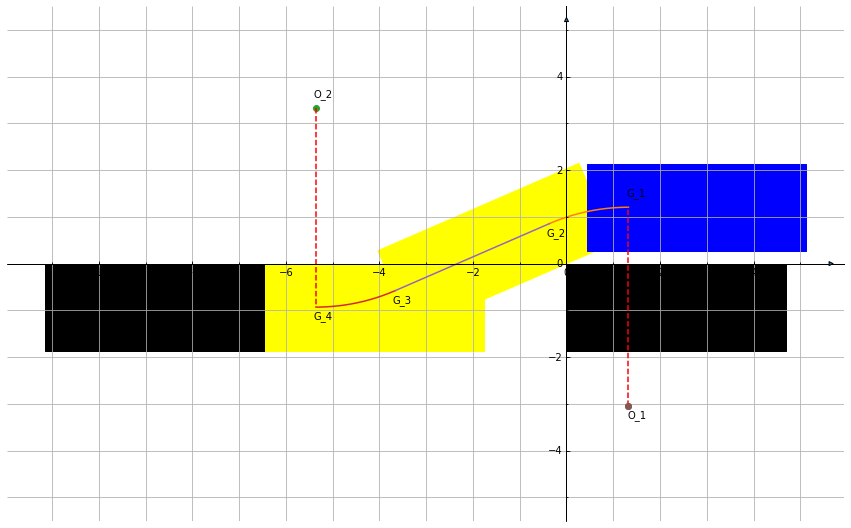

In [4]:
#ploting x and y axis
fig = plt.figure(figsize=(15, 15))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>, size=-1")
    ax.axis[direction].set_visible(True)

ax.add_patch(Rectangle((0, 0), (l+l_f+l_r), -w,color="black"))
ax.add_patch(Rectangle((-s_0, 0),-(l+l_f+l_r), -w,color="black"))
ax.add_patch(Rectangle((-s_0, 0), l+l_f+l_r, -w,color="yellow"))
ang = np.arctan((G_2[1]- G_3[1])/(G_2[0]-G_3[0]))
ang = (ang*180)/np.pi
ax.add_patch(Rectangle(G_3, l+l_f+l_r, w/2, angle = ang, color="yellow"))
ax.add_patch(Rectangle(G_3, l+l_f+l_r, -w/2, angle = ang, color="yellow"))
ax.add_patch(Rectangle((initial_p[0]-l_f, initial_p[1]), l+l_f+l_r, -w/2, color="blue"))
ax.add_patch(Rectangle((initial_p[0]-l_f, initial_p[1]), l+l_f+l_r, w/2, color="blue"))
    
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
x, y = np.meshgrid(X, Y)

plot = plt.plot(x, y, ls='none')
plot = plt.plot(o_1[0], o_1[1], marker='o')             #ploting o_1 center point

#plot curve
Angle1 = np.linspace((np.pi/2)+theta, np.pi/2, 150)

Gx1 = r_min*np.cos(Angle1) + o_1[0]
Gy1 = r_min*np.sin(Angle1) + o_1[1]
plot = plt.plot(Gx1, Gy1)                               #ploting first curve 

plot = plt.plot(o_2[0], o_2[1], marker='o')             #ploting o_2 center point

Angle2 = np.linspace(-(np.pi/2)+theta, -(np.pi/2), 150)
Gx2 = r_min*np.cos(Angle2) + o_2[0]
Gy2 = r_min*np.sin(Angle2) + o_2[1]
plot = plt.plot(Gx2, Gy2)                               #ploting last curve

Gx2 = [G_2[0], G_3[0]]
Gy2 = [G_2[1], G_3[1]]
plot = plt.plot(Gx2, Gy2)                               #ploting stright line

rx1 = [o_1[0], initial_p[0]]
ry1 = [o_1[1], initial_p[1]]
plot = plt.plot(rx1, ry1, linestyle='--', color='r')

rx2 = [o_2[0], final_p[0]]
ry2 = [o_2[1], final_p[1]]
plot = plt.plot(rx2, ry2, linestyle='--', color='r')

plt.text(o_1[0]-0.015, o_1[1]-0.25, "O_1")
plt.text(o_2[0]-0.050, o_2[1]+0.25, "O_2")
plt.text(initial_p[0]-0.050, initial_p[1]+0.25, "G_1")
plt.text(G_2[0]-0.050, G_2[1]-0.25, "G_2")
plt.text(G_3[0]-0.050, G_3[1]-0.25, "G_3")
plt.text(final_p[0]-0.050, final_p[1]-0.25, "G_4")

spacing = 1
minorLocator = MultipleLocator(spacing)
ax.plot(o_1[0], o_1[1], marker='o')
# Set minor tick locations.
ax.yaxis.set_minor_locator(minorLocator)
ax.xaxis.set_minor_locator(minorLocator)
# Set grid to use minor tick locations. 
ax.grid(which = 'minor', axis='both')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('Path planning for given position.png')

plt.show()